In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

kepler_df = pd.read_csv('kepler.csv')
kepler_df['density']= kepler_df['mass']/((4/3)*(kepler_df['radius'])**3)

In [2]:
df1= kepler_df[['name','mass','radius','orbital_period','molecules','density']]
kepler_df1=df1.groupby('name')[['mass','radius','density']]
kepler_mol=df1[['name','mass','molecules','density']]
df2= kepler_df[['name','detection_type','mass_detection_type','radius_detection_type','orbital_period','mass','radius','star_distance','star_sp_type']]
kepler_dt= df2.groupby(['detection_type'])[['name','mass_detection_type','radius_detection_type']]
kepler_dt2 = df2[['detection_type','name' ,'orbital_period','mass','mass_detection_type','radius','radius_detection_type']]

In [3]:
kepler_df1.apply(lambda _kepler_mass:_kepler_mass.sort_values(by=['density'],axis=0))
kepler_df1.apply((lambda _kepler_mass:_kepler_mass.dropna(thresh=2)))

,,mass,radius,density
name,,,,
1RXS 1609 b,9,14.000000,1.700000,2.137187
2M 0122-24 b,14,20.000000,1.000000,15.000000
2M 0219-39 b,15,13.900000,1.440000,3.491311
2M 0746+20 b,17,30.000000,0.970000,24.652860
2M 2140+16 b,21,20.000000,0.920000,19.263171
2M 2206-20 b,22,30.000000,1.300000,10.241238
51 Eri b,36,9.100000,1.110000,4.990381
51 Peg b,37,0.470000,1.900000,0.051392
55 Cnc e,41,0.025470,0.177536,3.413731


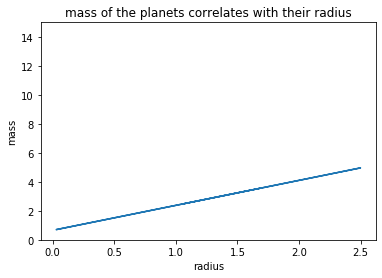

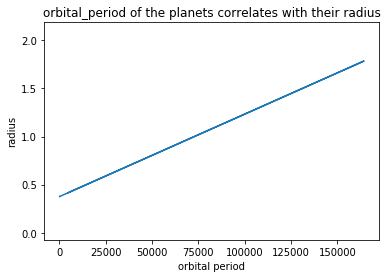

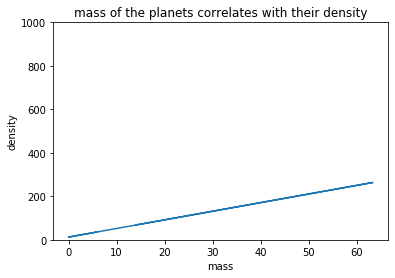

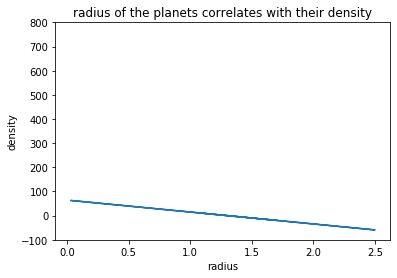

In [123]:
def PLOT(dataset_x,dataset_y):
    from sklearn.linear_model import LinearRegression
    line=LinearRegression()
    x=len(dataset_x)
    X=dataset_x.values.reshape(x,-1)
    y=dataset_y.values.reshape(x,-1)
    line.fit(X,y)
    plt.plot(X,line.predict(X))

graph1=df1[['mass','radius']].dropna()
plt.title('mass of the planets correlates with their radius')
plt.xlabel('radius')
plt.ylabel('mass')
plt.ylim(0,15)
PLOT(graph1['radius'],graph1['mass'])
plt.plot(graph1['radius'],graph1['mass'],alpha=0)
plt.show()

graph2=df1[['radius','orbital_period']].dropna()
plt.title('orbital_period of the planets correlates with their radius')
plt.ylabel('radius')
plt.xlabel('orbital period')
PLOT(graph2['orbital_period'],graph2['radius'])
plt.plot(graph2['orbital_period'],graph2['radius'],alpha=0)
plt.show()

graph3=df1[['density','mass']].dropna()
plt.title('mass of the planets correlates with their density')
plt.xlabel('mass')
plt.ylabel('density')
plt.ylim(0,1000)
PLOT(graph3['mass'],graph3['density'])
plt.plot(graph3['mass'],graph3['density'],alpha=0)
plt.show()

graph4=df1[['density','radius']].dropna()
plt.title('radius of the planets correlates with their density')
plt.xlabel('radius')
plt.ylabel('density')
plt.ylim(-100,800)
PLOT(graph4['radius'],graph4['density'])
plt.plot(graph4['radius'],graph4['density'],alpha=0)
plt.show()

In [5]:
kepler_mol[kepler_mol.molecules.notnull()].sort_values(by='mass',axis=0)

,name,mass,molecules,density
3497,TRAPPIST-1 d,0.001300,H2O,2.980897
3498,TRAPPIST-1 e,0.002000,H2O,2.730483
3499,TRAPPIST-1 f,0.002100,H2O,1.943630
3495,TRAPPIST-1 b,0.002700,H2O,2.226323
3500,TRAPPIST-1 g,0.004220,H2O,3.117996
3496,TRAPPIST-1 c,0.004340,H2O,3.892781
173,GJ 1132 b,0.005100,"O2, H2, N2, CO2",3.500417
41,55 Cnc e,0.025470,"H2O, HCN",3.413731
274,HAT-P-26 b,0.058522,H2O,0.243706
211,GJ 436 b,0.070000,"CH4, H, CO2, CO, H2O",0.956772


Text(0.5, 0, 'counts')

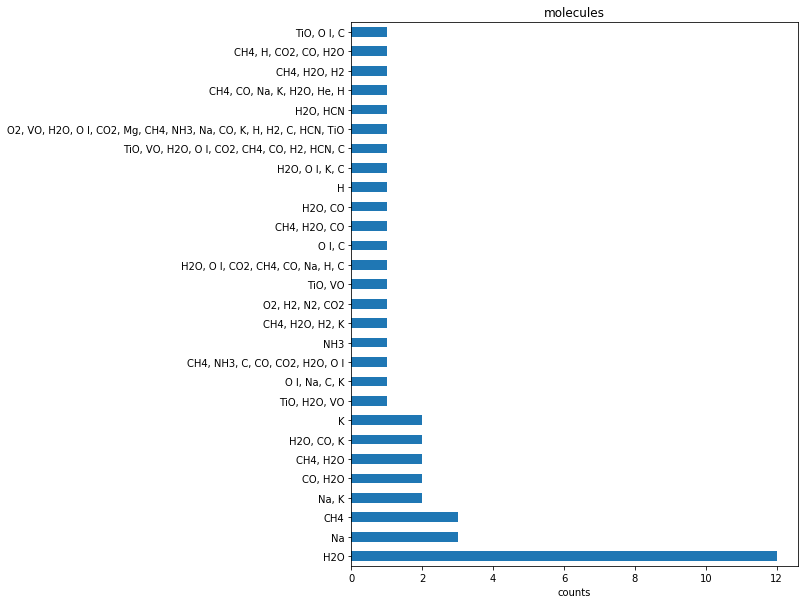

In [6]:
fig=plt.figure(figsize=(8,10))
kepler_mol['molecules'].value_counts().plot.barh()
plt.title('molecules')
plt.xlabel('counts')

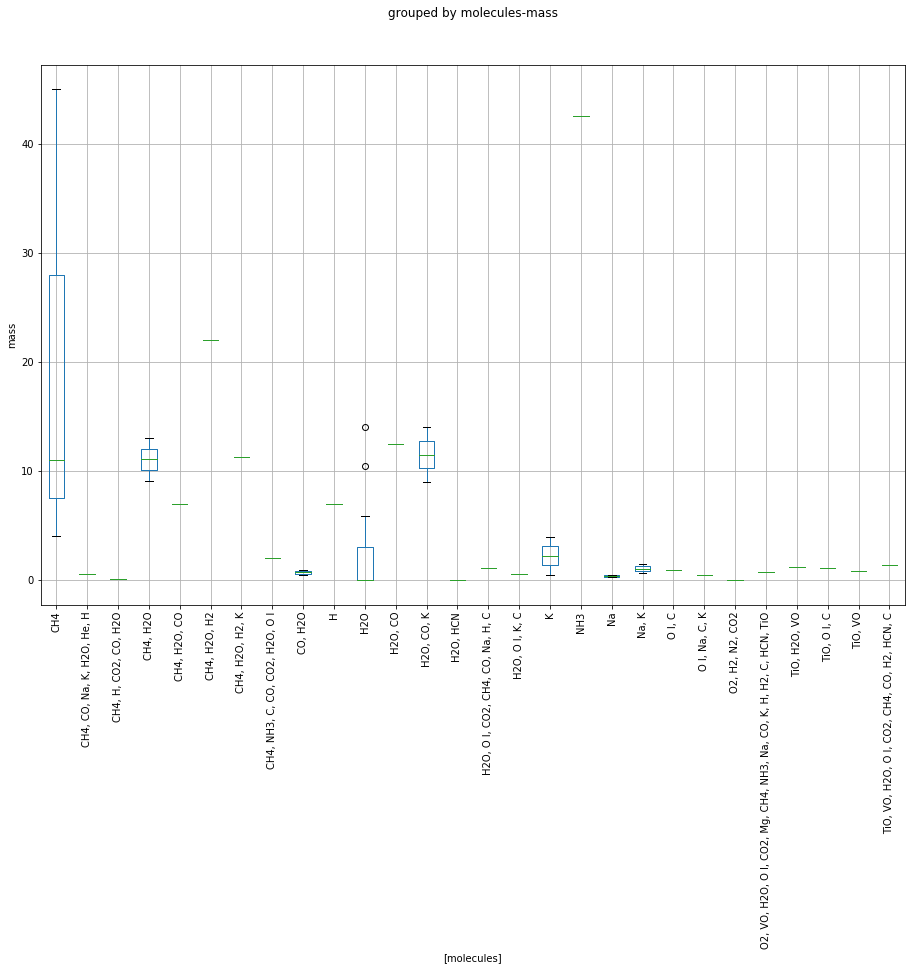

,count,mean,std,min,25%,50%,75%,max
molecules,,,,,,,,
CH4,3.0,20.000000,21.931712,4.00000,7.50000,11.00000,28.00000,45.00000
"CH4, CO, Na, K, H2O, He, H",1.0,0.554000,NaN,0.55400,0.55400,0.55400,0.55400,0.55400
"CH4, H, CO2, CO, H2O",1.0,0.070000,NaN,0.07000,0.07000,0.07000,0.07000,0.07000
"CH4, H2O",2.0,11.050000,2.757716,9.10000,10.07500,11.05000,12.02500,13.00000
"CH4, H2O, CO",1.0,7.000000,NaN,7.00000,7.00000,7.00000,7.00000,7.00000
"CH4, H2O, H2",1.0,22.000000,NaN,22.00000,22.00000,22.00000,22.00000,22.00000
"CH4, H2O, H2, K",1.0,11.300000,NaN,11.30000,11.30000,11.30000,11.30000,11.30000
"CH4, NH3, C, CO, CO2, H2O, O I",1.0,2.052000,NaN,2.05200,2.05200,2.05200,2.05200,2.05200
"CO, H2O",2.0,0.695000,0.318198,0.47000,0.58250,0.69500,0.80750,0.92000


In [7]:
fig,ax=plt.subplots(figsize=(15,10))
ax=kepler_mol.loc[:,['molecules','mass']].boxplot(by=['molecules'],ax=ax)
for label in ax.xaxis.get_ticklabels() : label.set_rotation(90)
ax.set_ylabel('mass')
fig.suptitle('grouped by molecules-mass')
ax.set_title('')
plt.show()
kepler_mol.groupby('molecules')['mass'].describe()

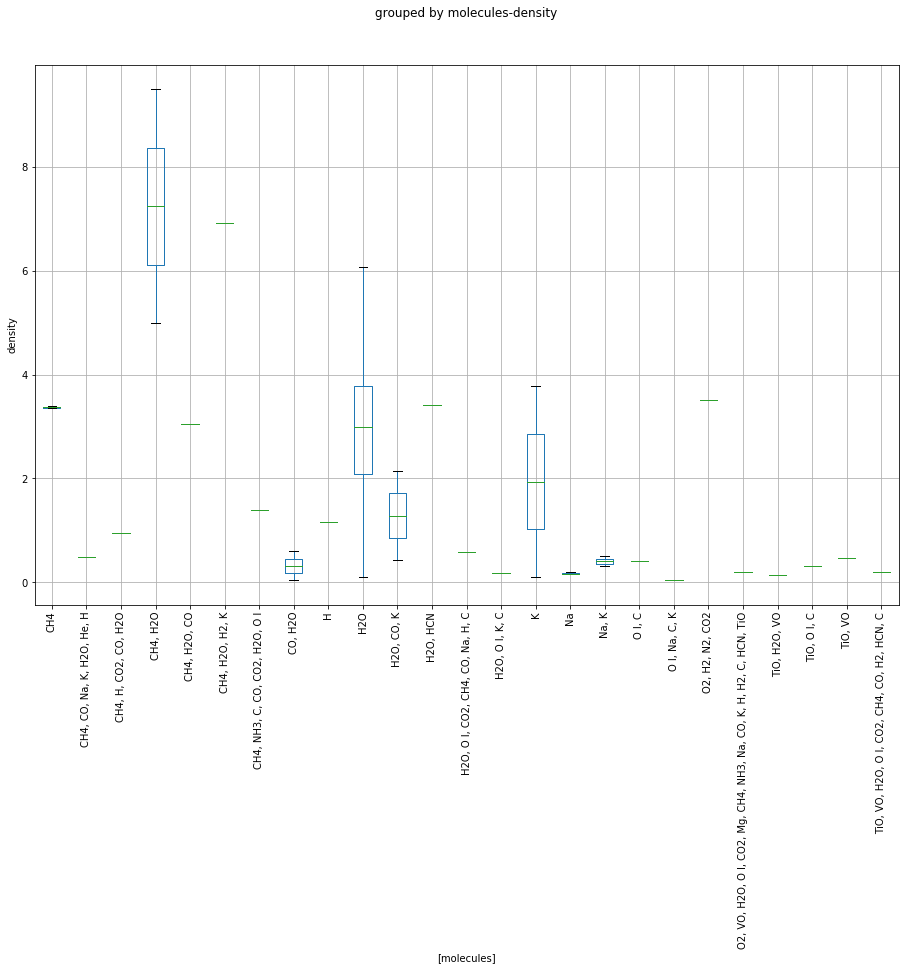

,count,mean,std,min,25%,50%,75%,max
molecules,,,,,,,,
CH4,2.0,3.371995,0.026654,3.353147,3.362571,3.371995,3.381418,3.390842
"CH4, CO, Na, K, H2O, He, H",1.0,0.481571,NaN,0.481571,0.481571,0.481571,0.481571,0.481571
"CH4, H, CO2, CO, H2O",1.0,0.956772,NaN,0.956772,0.956772,0.956772,0.956772,0.956772
"CH4, H2O",2.0,7.240900,3.182714,4.990381,6.115640,7.240900,8.366159,9.491418
"CH4, H2O, CO",1.0,3.038194,NaN,3.038194,3.038194,3.038194,3.038194,3.038194
"CH4, H2O, H2",1.0,18.649631,NaN,18.649631,18.649631,18.649631,18.649631,18.649631
"CH4, H2O, H2, K",1.0,6.918125,NaN,6.918125,6.918125,6.918125,6.918125,6.918125
"CH4, NH3, C, CO, CO2, H2O, O I",1.0,1.384074,NaN,1.384074,1.384074,1.384074,1.384074,1.384074
"CO, H2O",2.0,0.323720,0.385130,0.051392,0.187556,0.323720,0.459884,0.596048


In [8]:
fig,ax=plt.subplots(figsize=(15,10))
ax=kepler_mol.loc[kepler_mol['density']<=10,['molecules','density']].boxplot(by=['molecules'],ax=ax)
for label in ax.xaxis.get_ticklabels() : label.set_rotation(90)
ax.set_ylabel('density')
fig.suptitle('grouped by molecules-density')
ax.set_title('')
plt.show()
kepler_mol.groupby('molecules')['density'].describe()

In [9]:
kepler_dt.apply(lambda _kepler_dt:_kepler_dt.sort_values(by=['name'],axis=0))

name mass_detection_type  \
detection_type                                                 
Astrometry      562          HD 176051 b                 NaN   
Imaging         2               11 Oph b                 NaN   
                8             1I/2017 U1                 NaN   
                9            1RXS 1609 b                 NaN   
                13     2M 0103-55 (AB) b                 NaN   
                14          2M 0122-24 b                 NaN   
                15          2M 0219-39 b            Spectrum   
                16          2M 0441+23 b                 NaN   
                17          2M 0746+20 b                 NaN   
                18            2M 1207-39            Spectrum   
                19          2M 1207-39 b                 NaN   
                21          2M 2140+16 b                 NaN   
                22          2M 2206-20 b                 NaN   
                23        2M 2236+4751 b            Spectrum   
                24         2M J2126-81 b            Spectrum   
                25       2M1450-7841 B b            Spectrum   
                26         2M1450-7841 b            Spectrum   
                27           2M2250+2325            Spectrum   
                28    2MASS J11193254 AB                 NaN   
                36              51 Eri b            Spectrum   
                53              AB Pic b                 NaN   
                77          CD-35 2722 b                 NaN   
                78           CFBDS 1458          Theoretical   
                79          CFBDS 1458 b                 NaN   
                80    CFBDSIR J2149-0403                 NaN   
                81             CHXR 73 b                 NaN   
                83              CT Cha b                 NaN   
                120          DE0823-49 b          Astrometry   
                121             DH Tau b                 NaN   
                170             FU Tau b                 NaN   
...                                  ...                 ...   
Radial Velocity 3705       gamma 1 Leo b                 NaN   
                3706      gamma Cephei b                 NaN   
                3708         kappa CrB b                 NaN   
                3710           ksi Aql b                 NaN   
                3711            mu Ara b                 NaN   
                3712            mu Ara c                 NaN   
                3713            mu Ara d                 NaN   
                3714            mu Ara e                 NaN   
                3715            mu Leo b                 NaN   
                3716            nu Oph b                 NaN   
                3717            nu Oph c                 NaN   
                3718           ome Ser b                 NaN   
                3719           omi CrB b                 NaN   
                3720           omi UMa b                 NaN   
                3721           sig Per b                 NaN   
                3722           tau Boo b     Radial Velocity   
                3723           tau Cet e     Radial Velocity   
                3724           tau Cet f     Radial Velocity   
                3725           tau Cet g     Radial Velocity   
                3726           tau Cet h                 NaN   
                3727           tau Gem b                 NaN   
                3728           ups And b     Radial Velocity   
                3729           ups And c     Radial Velocity   
                3730           ups And d     Radial Velocity   
                3731           ups And e                 NaN   
TTV             1060          KOI-620.02                 NaN   
                2417        Kepler-338 e                 NaN   
                2594        Kepler-419 c                 NaN   
                2655         Kepler-46 c                 TTV   
                2764        Kepler-539 c                 TTV   

   

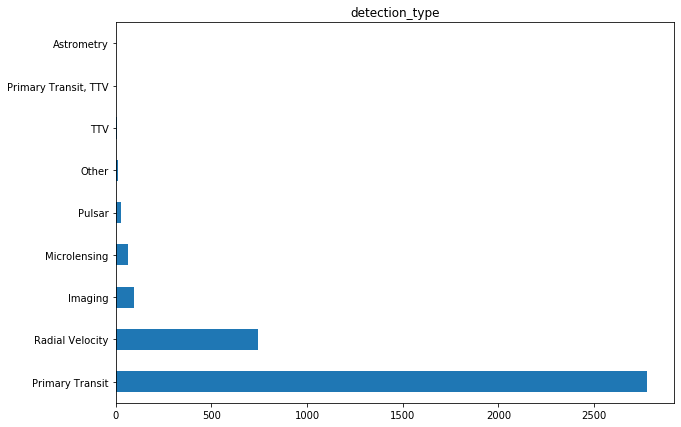

In [10]:
fig=plt.figure(figsize=(10,7))
ax=kepler_dt2['detection_type'].value_counts().plot.barh()
ax.set_title('detection_type')
plt.show()

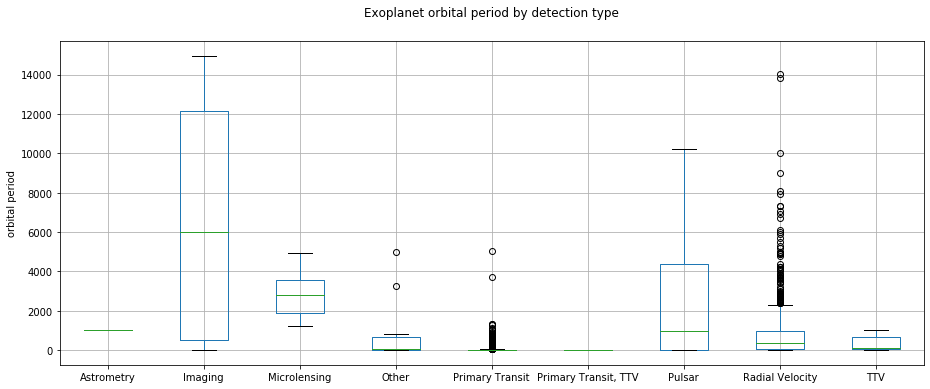

,count,mean,std,min,25%,50%,75%,max
detection_type,,,,,,,,
Astrometry,1.0,1016.000000,NaN,1016.00000,1016.000000,1016.000000,1016.000000,1016.0000
Imaging,22.0,81830.969681,162944.603380,0.24010,7676.500000,21900.000000,73458.750000,730000.0000
Microlensing,7.0,2827.800000,1281.937861,1223.60000,1880.000000,2780.000000,3550.000000,4931.0000
Other,10.0,950.217864,1731.533531,0.03200,17.206500,78.779800,689.427042,4967.0000
Primary Transit,2777.0,34.270199,147.533969,0.05400,4.081423,9.520000,23.238279,5040.0000
"Primary Transit, TTV",2.0,4.910005,5.827118,0.78961,2.849807,4.910005,6.970203,9.0304
Pulsar,27.0,3819.916078,7320.422092,0.06700,0.595805,1170.000000,4520.000000,36525.0000
Radial Velocity,744.0,845.758905,1489.456074,1.22003,35.253750,350.600000,962.250000,14002.0000
TTV,5.0,374.401898,440.358664,9.34149,57.004000,130.194000,675.470000,1000.0000


In [11]:
fig,ax=plt.subplots(figsize=(15,6))
ax=kepler_dt2.loc[kepler_dt2['orbital_period']<=15000,['detection_type','orbital_period']].boxplot(by=['detection_type'],ax=ax)
ax.set_xlabel('')
ax.set_ylabel('orbital period')
fig.suptitle('Exoplanet orbital period by detection type')
ax.set_title('')
plt.show()
kepler_dt2.groupby('detection_type')['orbital_period'].describe()

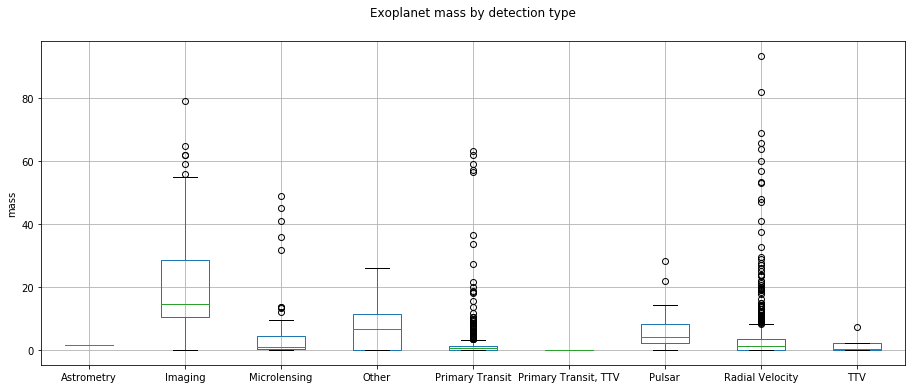

,count,mean,std,min,25%,50%,75%,max
detection_type,,,,,,,,
Astrometry,1.0,1.500000,NaN,1.500000,1.50000,1.5000,1.50000,1.5000
Imaging,92.0,21.083545,16.725357,0.002100,10.43750,14.5000,28.50000,79.0000
Microlensing,65.0,5.608487,10.929084,0.004500,0.18878,0.8800,4.60000,49.0000
Other,14.0,7.215761,8.049841,0.022300,0.12477,6.8350,11.36500,26.2000
Primary Transit,635.0,1.900346,6.118519,0.000002,0.05220,0.5950,1.37000,63.4000
"Primary Transit, TTV",2.0,0.035900,0.009758,0.029000,0.03245,0.0359,0.03935,0.0428
Pulsar,27.0,6.142047,6.750956,0.000070,2.09000,4.2000,8.24000,28.3000
Radial Velocity,745.0,3.952970,9.009504,0.002400,0.17800,1.3000,3.42000,93.6000
TTV,5.0,2.022582,3.111597,0.023912,0.02700,0.3620,2.40000,7.3000


In [12]:
fig,ax=plt.subplots(figsize=(15,6))
ax=kepler_dt2.loc[:,['detection_type','mass']].boxplot(by=['detection_type'],ax=ax)
ax.set_xlabel('')
ax.set_ylabel('mass')
fig.suptitle('Exoplanet mass by detection type')
ax.set_title('')
plt.show()
kepler_dt2.groupby('detection_type')['mass'].describe()

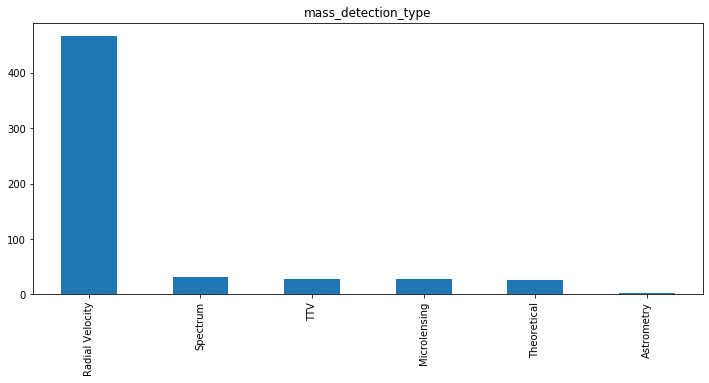

Radial Velocity    467
Spectrum            31
TTV                 28
Microlensing        27
Theoretical         26
Astrometry           3
Name: mass_detection_type, dtype: int64


detection_type        mass_detection_type
Imaging               Astrometry               1
                      Spectrum                30
                      Theoretical              3
Microlensing          Microlensing            26
Other                 Radial Velocity          2
                      TTV                      2
                      Theoretical              4
Primary Transit       Radial Velocity        230
                      Spectrum                 1
                      TTV                     22
                      Theoretical             19
Primary Transit, TTV  Radial Velocity          2
Pulsar                Microlensing             1
                      Radial Velocity          2
                      TTV                      2
Radial Velocity       Astrometry           

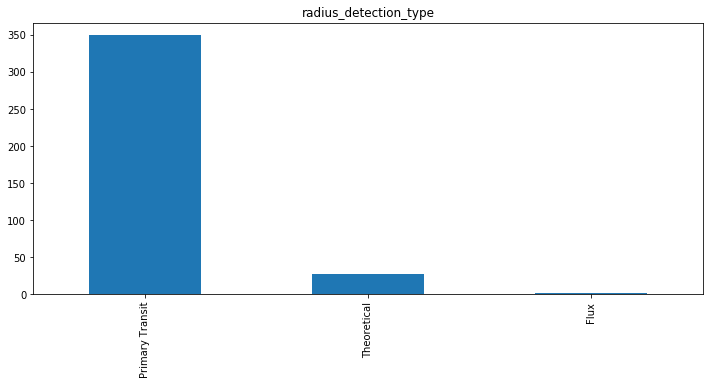

Primary Transit    349
Theoretical         28
Flux                 2
Name: radius_detection_type, dtype: int64


detection_type        radius_detection_type
Imaging               Flux                       2
                      Theoretical                5
Primary Transit       Primary Transit          339
                      Theoretical                1
Primary Transit, TTV  Primary Transit            2
Radial Velocity       Primary Transit            5
                      Theoretical               22
Name: radius, dtype: int64


In [13]:
plt.figure(figsize=(12,5))
ax=kepler_dt2['mass_detection_type'].value_counts().plot.bar()
ax.set_title('mass_detection_type')
plt.show()
print(df2['mass_detection_type'].value_counts())
print('\n')
print(kepler_dt2.groupby(['detection_type','mass_detection_type'])['mass'].count())

plt.figure(figsize=(12,5))
ax=kepler_dt2['radius_detection_type'].value_counts().plot.bar()
ax.set_title('radius_detection_type')
plt.show()
print(df2['radius_detection_type'].value_counts())
print('\n')
print(kepler_dt2.groupby(['detection_type','radius_detection_type'])['radius'].count())

In [14]:
d_transit = kepler_dt2[kepler_dt2.detection_type == 'Primary Transit']

In [15]:
pt=d_transit.groupby(['detection_type','mass_detection_type','radius_detection_type'])[['mass','radius','orbital_period']]
pt.apply(lambda _pt:_pt.describe())

mass  \
detection_type  mass_detection_type radius_detection_type                     
Primary Transit Radial Velocity     Primary Transit       count  215.000000   
                                                          mean     2.393964   
                                                          std      8.741602   
                                                          min      0.000470   
                                                          25%      0.118500   
                                                          50%      0.650000   
                                                          75%      1.285000   
                                                          max     63.400000   
                                    Theoretical           count    1.000000   
                                                          mean     0.070000   
                                                          std           NaN   
                                                          min      0.070000   
                                                          25%      0.070000   
                                                          50%      0.070000   
                                                          75%      0.070000   
                                                          max      0.070000   
                Spectrum            Primary Transit       count    1.000000   
                                                          mean    10.000000   
                                                          std           NaN   
                                                          min     10.000000   
                                                          25%     10.000000   
                                                          50%     10.000000   
                                                          75%     10.000000   
                                                          max     10.000000   
                TTV                 Primary Transit       count   18.000000   
                                                          mean     0.010042   
                                                          std      0.007204   
                                                          min      0.000210   
                                                          25%      0.003080   
                                                          50%      0.011785   
                                                          75%      0.013792   
                                                          max      0.023400   
                Theoretical         Primary Transit       count   17.000000   
                                                          mean     0.936857   
                                                          std      2.547963   
                                                          min      0.006000   
                                                          25%      0.010000   
                                                          50%      0.026000   
                                                          75%      0.030000   
                                                          max     10.000000   

                                                                     radius  \
detection_type  mass_detection_type radius_detection_type                     
Primary Transit Radial Velocity     Primary Transit       count  213.000000   
                                                          mean     0.984418   
                                                          std      0.528934   
                                                          min      0.052000   
                                                          25%      0.480000   
                                                          50%      1.130000   
                                                          75%      1.380000   
                                         

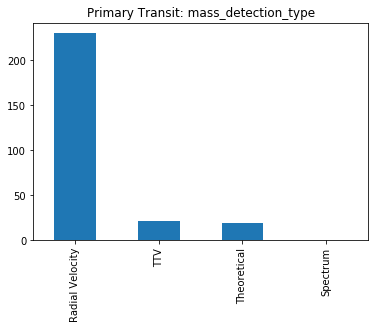

TOTAL Primary Transit 272
Radial Velocity    230
TTV                 22
Theoretical         19
Spectrum             1
Name: mass_detection_type, dtype: int64




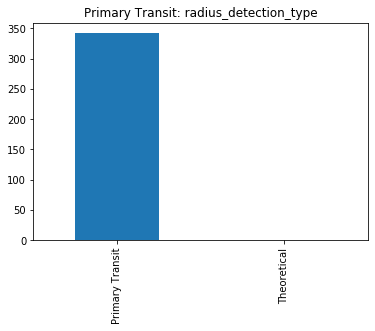

TOTAL Primary Transit 343
Primary Transit    342
Theoretical          1
Name: radius_detection_type, dtype: int64


Primary Transit    357
Name: detection_type, dtype: int64


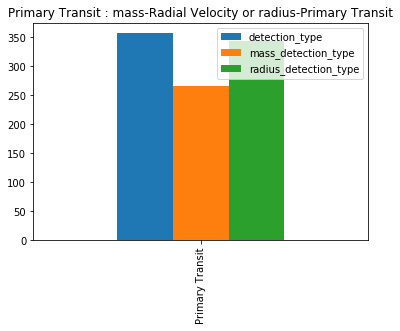

                 detection_type  mass_detection_type  radius_detection_type
detection_type                                                             
Primary Transit             357                  266                    343


In [16]:
d_transit['mass_detection_type'].value_counts().plot.bar()
plt.title('Primary Transit: mass_detection_type')
plt.show()
print('TOTAL Primary Transit',d_transit['mass_detection_type'].count())
print(d_transit['mass_detection_type'].value_counts())
print('\n')

d_transit['radius_detection_type'].value_counts().plot.bar()
plt.title('Primary Transit: radius_detection_type')
plt.show()
print('TOTAL Primary Transit',d_transit['radius_detection_type'].count())
print(d_transit['radius_detection_type'].value_counts())
print('\n')

mrt=d_transit[(d_transit.mass_detection_type=='Radial Velocity')|(d_transit.radius_detection_type=='Primary Transit')]
print(mrt['detection_type'].value_counts())
g_mrt=mrt.groupby('detection_type')[['detection_type','mass_detection_type','radius_detection_type']]
ax=g_mrt.count().plot.bar()
ax.set_xlabel('')
ax.set_title('Primary Transit : mass-Radial Velocity or radius-Primary Transit')
plt.show()
print(g_mrt.apply(lambda _g_mrt:_g_mrt.count()))

In [17]:
d_velocity= kepler_dt2[kepler_dt2.detection_type=='Radial Velocity']

In [18]:
rv=d_velocity.groupby(['detection_type','mass_detection_type','radius_detection_type'])[['mass','radius','orbital_period']]
rv.apply(lambda _rv:_rv.describe())

mass  \
detection_type  mass_detection_type radius_detection_type                    
Radial Velocity Radial Velocity     Primary Transit       count   5.000000   
                                                          mean    0.869600   
                                                          std     0.776177   
                                                          min     0.027000   
                                                          25%     0.576000   
                                                          50%     0.729000   
                                                          75%     0.884000   
                                                          max     2.132000   
                                    Theoretical           count  22.000000   
                                                          mean    1.607150   
                                                          std     3.948609   
                                                          min     0.027300   
                                                          25%     0.285000   
                                                          50%     0.430000   
                                                          75%     0.845000   
                                                          max    18.400000   

                                                                    radius  \
detection_type  mass_detection_type radius_detection_type                    
Radial Velocity Radial Velocity     Primary Transit       count   5.000000   
                                                          mean    1.084800   
                                                          std     0.579423   
                                                          min     0.170000   
                                                          25%     1.045000   
                                                          50%     1.074000   
                                                          75%     1.429000   
                                                          max     1.706000   
                                    Theoretical           count  22.000000   
                                                          mean    1.078636   
                                                          std     0.186785   
                                                          min     0.980000   
                                                          25%     1.022500   
                                                          50%     1.050000   
                                                          75%     1.060000   
                                                          max     1.900000   

                                                                 orbital_period  
detection_type  mass_detection_type radius_detection_type                        
Radial Velocity Radial Velocity     Primary Transit       count        5.000000  
                                                          mean         3.663741  
                                                          std          1.049681  
                                                          min          2.716476  
                                                          25%          2.989593  
                                                          50%          3.309844  
                                                          75%          3.951621  
                                                          max          5.351170  
                                    Theoretical           count       22.000000  
                                                          mean         4.325312  
                                                          std          3.298203  
                                                          min          1.323630  
                                                          25%          3.040810  
                              

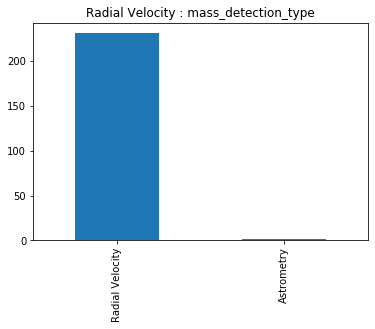

TOTAL Radial Velocity 233
Radial Velocity    231
Astrometry           2
Name: mass_detection_type, dtype: int64




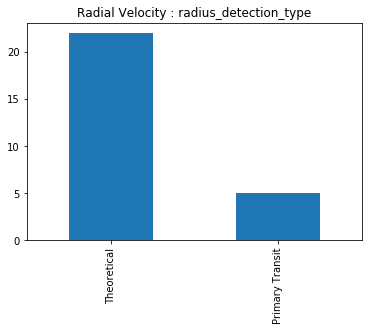

TOTAL Radial Velocity 27
Theoretical        22
Primary Transit     5
Name: radius_detection_type, dtype: int64


Radial Velocity    231
Name: detection_type, dtype: int64


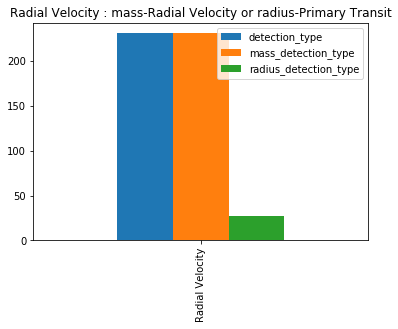

                 detection_type  mass_detection_type  radius_detection_type
detection_type                                                             
Radial Velocity             231                  231                     27


In [19]:
d_velocity['mass_detection_type'].value_counts().plot.bar()
plt.title('Radial Velocity : mass_detection_type')
plt.show()
print('TOTAL Radial Velocity',d_velocity['mass_detection_type'].count())
print(d_velocity['mass_detection_type'].value_counts())
print('\n')

d_velocity['radius_detection_type'].value_counts().plot.bar()
plt.title('Radial Velocity : radius_detection_type')
plt.show()
print('TOTAL Radial Velocity',d_velocity['radius_detection_type'].count())
print(d_velocity['radius_detection_type'].value_counts())
print('\n')

mrt=d_velocity[(d_velocity.mass_detection_type=='Radial Velocity')|(d_velocity.radius_detection_type=='Primary Transit')]
print(mrt['detection_type'].value_counts())
g_mrt=mrt.groupby('detection_type')[['detection_type','mass_detection_type','radius_detection_type']]
ax=g_mrt.count().plot.bar()
ax.set_xlabel('')
ax.set_title('Radial Velocity : mass-Radial Velocity or radius-Primary Transit')
plt.show()
print(g_mrt.apply(lambda _g_mrt:_g_mrt.count()))